In [2]:
import cv2
from PIL import Image

cap = cv2.VideoCapture(0)

# MobileNetV2 takes in image sizes of 224x224
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 224)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 224)
cap.set(cv2.CAP_PROP_FPS, 36)

True

In [3]:
ret, image = cap.read()
# convert opencv output from BGR to RGB
image = image[:, :, [2, 1, 0]]

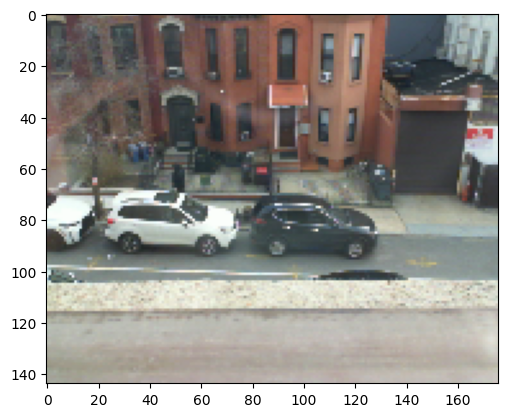

In [4]:
from matplotlib import pyplot as plt

im = plt.imshow(image)

In [5]:
# We need to take the frames and transform them into the format the model expects
# This is the same processing as you would do on any machine with the standard torchvision transforms.

from torchvision import transforms

preprocess = transforms.Compose([
    # convert the frame to a CHW torch tensor for training
    transforms.ToTensor(),
    # normalize the colors to the range that mobilenet_v2/3 expect
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(image)
# The model can handle multiple images simultaneously so we need to add an
# empty dimension for the batch.
# [3, 224, 224] -> [1, 3, 224, 224]
input_batch = input_tensor.unsqueeze(0)

In [6]:
import torch
torch.backends.quantized.engine = 'qnnpack'

from torchvision import models
net = models.quantization.mobilenet_v2(pretrained=True, quantize=True)

net = torch.jit.script(net)

/home/mjm682/repos/nysee/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/mjm682/repos/nysee/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_QuantizedWeights.IMAGENET1K_QNNPACK_V1`. You can also use `weights=MobileNet_V2_QuantizedWeights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/mjm682/repos/nysee/venv/lib/python3.11/site-packages/torch/ao/quantization/utils.py:339: UserWarning: must run observer before calling calculate_qparams. Returning default values.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/quantized/mobilenet_v2_qnnpack_37f702c5.pth" to /hom